#Fake News Detection

**Importing Libraries**

In [255]:
# Importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


**Load the Dataset**

In [256]:
# Load the dataset
train_df = pd.read_csv('/content/train[1].csv')
train_df

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True
...,...,...
10235,There are a larger number of shark attacks in ...,True
10236,Democrats have now become the party of the [At...,True
10237,Says an alternative to Social Security that op...,True
10238,On lifting the U.S. Cuban embargo and allowing...,False


**Data Exploration**

In [257]:
#Headings

train_df.head()

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


In [258]:
#Tail or Bottom lines

train_df.tail()

,Statement,Label
10235,There are a larger number of shark attacks in ...,True
10236,Democrats have now become the party of the [At...,True
10237,Says an alternative to Social Security that op...,True
10238,On lifting the U.S. Cuban embargo and allowing...,False
10239,The Department of Veterans Affairs has a manua...,False


In [259]:
#Info

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB


In [260]:
#Shape

train_df.shape

(10240, 2)

In [261]:
#Describe

train_df.describe()

,Statement,Label
count,10240,10240
unique,10223,2
top,On changing the rules for filibusters on presi...,True
freq,3,5752


In [262]:
#Getting Labels

train_df.Label

0        False
1         True
2         True
3        False
4         True
         ...  
10235     True
10236     True
10237     True
10238    False
10239    False
Name: Label, Length: 10240, dtype: bool

In [263]:
#Getting Statements

train_df.Statement

0        Says the Annies List political group supports ...
1        When did the decline of coal start? It started...
2        Hillary Clinton agrees with John McCain "by vo...
3        Health care reform legislation is likely to ma...
4        The economic turnaround started at the end of ...
                               ...                        
10235    There are a larger number of shark attacks in ...
10236    Democrats have now become the party of the [At...
10237    Says an alternative to Social Security that op...
10238    On lifting the U.S. Cuban embargo and allowing...
10239    The Department of Veterans Affairs has a manua...
Name: Statement, Length: 10240, dtype: object

In [264]:
#Removing Null Values

train_df.dropna()

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True
...,...,...
10235,There are a larger number of shark attacks in ...,True
10236,Democrats have now become the party of the [At...,True
10237,Says an alternative to Social Security that op...,True
10238,On lifting the U.S. Cuban embargo and allowing...,False


In [265]:
#Data Quality Check

def data_qualityCheck():
    print("Checking data qualitites...")
    train_df.isnull().sum()
    train_df.info()
    print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB
check finished.


**Data Visualization**

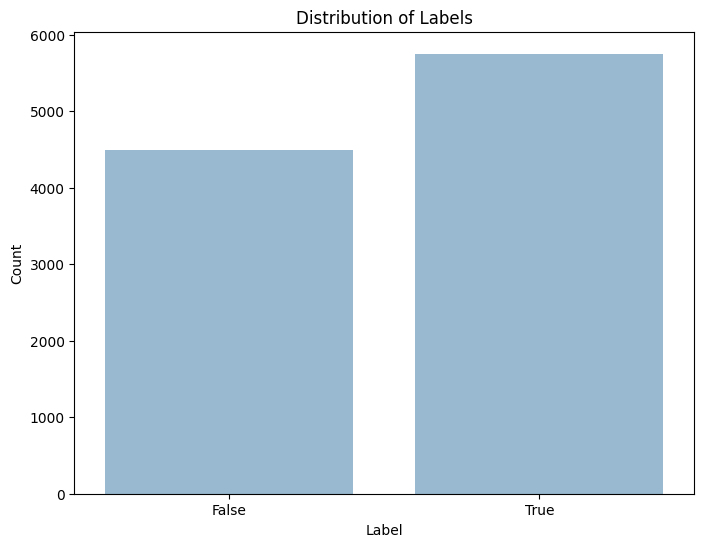

In [266]:
#Bar plot

plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=train_df, alpha=0.5)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

**Training the Dataset**

In [267]:
# Splitting data into features and labels

X = train_df['Statement']
Y = train_df['Label']
X,Y

(0        Says the Annies List political group supports ...
 1        When did the decline of coal start? It started...
 2        Hillary Clinton agrees with John McCain "by vo...
 3        Health care reform legislation is likely to ma...
 4        The economic turnaround started at the end of ...
                                ...                        
 10235    There are a larger number of shark attacks in ...
 10236    Democrats have now become the party of the [At...
 10237    Says an alternative to Social Security that op...
 10238    On lifting the U.S. Cuban embargo and allowing...
 10239    The Department of Veterans Affairs has a manua...
 Name: Statement, Length: 10240, dtype: object,
 0        False
 1         True
 2         True
 3        False
 4         True
          ...  
 10235     True
 10236     True
 10237     True
 10238    False
 10239    False
 Name: Label, Length: 10240, dtype: bool)

In [268]:
# Initialize TF-IDF Vectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_vectorizer

TfidfVectorizer(max_df=0.7, stop_words='english')

In [269]:
# Fit and transform the data

X_tfidf = tfidf_vectorizer.fit_transform(X)
X_tfidf


<10240x11915 sparse matrix of type '<class 'numpy.float64'>'
	with 101536 stored elements in Compressed Sparse Row format>

In [270]:
#Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X,Y

(0        Says the Annies List political group supports ...
 1        When did the decline of coal start? It started...
 2        Hillary Clinton agrees with John McCain "by vo...
 3        Health care reform legislation is likely to ma...
 4        The economic turnaround started at the end of ...
                                ...                        
 10235    There are a larger number of shark attacks in ...
 10236    Democrats have now become the party of the [At...
 10237    Says an alternative to Social Security that op...
 10238    On lifting the U.S. Cuban embargo and allowing...
 10239    The Department of Veterans Affairs has a manua...
 Name: Statement, Length: 10240, dtype: object,
 0        False
 1         True
 2         True
 3        False
 4         True
          ...  
 10235     True
 10236     True
 10237     True
 10238    False
 10239    False
 Name: Label, Length: 10240, dtype: bool)

In [271]:
# Feature Engineering (TF-IDF Vectorization)

tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['Statement'])

In [272]:
#Initialize PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier(max_iter=50)

#Train the model

pac.fit(tfidf_matrix, train_df['Label'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


PassiveAggressiveClassifier(max_iter=50)

In [273]:
# Predict labels

Y_pred = pac.predict(X_tfidf)
Y_pred

array([False,  True,  True, ...,  True, False, False])

In [274]:
# Calculate accuracy

accuracy = accuracy_score(Y, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


In [275]:
# Confusion Matrix

conf_matrix = confusion_matrix(Y, Y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[4332  156]
 [ 120 5632]]


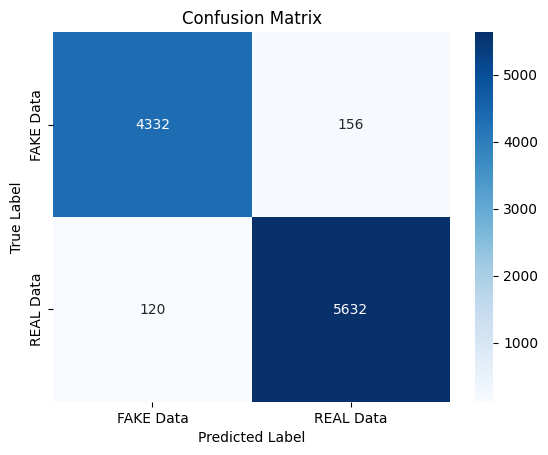

In [276]:
#Heatmap for Confusion Matrix

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['FAKE Data', 'REAL Data'], yticklabels=['FAKE Data', 'REAL Data'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [277]:
# Function to predict whether a statement is fake or real

def predict_statement(statement):
    statement_tfidf = tfidf_vectorizer.transform([statement])
    prediction = pac.predict(statement_tfidf)
    if prediction == 1:
        return "False"
    else:
        return "True"

In [278]:
# Output

Statement = "The earth is flat."
prediction = predict_statement(Statement)
print(f"Prediction for the statement '{Statement}': {prediction}")

Prediction for the statement 'The earth is flat.': False


**Conclusion and Insights**

1.Accuracy: 0.97

2.Confusion_Matrix: [[4331  157]
 [ 127 5625]]

3.Hence OUTPUT: Prediction for the statement 'The earth is flat.': False